#  Understand the optimization function of scipy, and do a simple test
 
### Use root and fsolve function of scipy.optimize to solve equation


[-9.9999546  2.5279632]


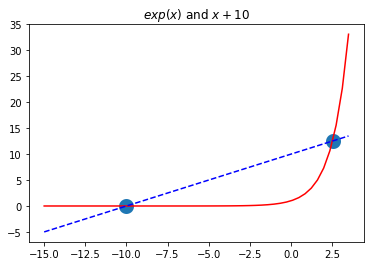

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve
#plt.rc('text', usetex=True) 

## solve f(x)=exp(x)-x-10
rangex1 = np.linspace(-15,3.5)
rangey1_1,rangey1_2 = np.exp(rangex1),rangex1+10
plt.figure(1)
plt.plot(rangex1,rangey1_1,'r',rangex1,rangey1_2,'b--')
plt.title('$exp(x)$ and $x+10$')

def f1(x):
 return np.exp(x)-x-10

sol1_root = root(f1,[-10,2.5])
sol1_fsolve = fsolve(f1,[-10,2.5])

plt.scatter(sol1_fsolve,np.exp(sol1_fsolve),linewidths=9)
print(sol1_fsolve)
plt.show()

# Calculate the solution of the equation

![title](./function.png)

[3.1494e-10 3.1494e-10]


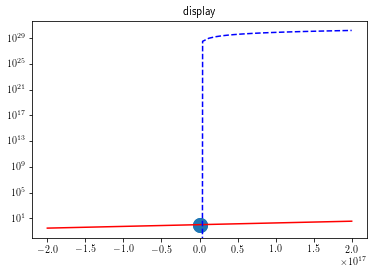

Text(0, 0.5, '$V_0$')

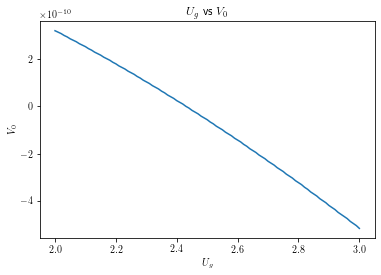

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve
plt.rc('text', usetex=True)

Ug=np.arange(2,3.01,0.01)
strsigma = '4.94E-10	4.97E-10	5.00E-10	5.04E-10	5.07E-10	5.11E-10	5.14E-10	5.17E-10	5.21E-10	5.24E-10	5.27E-10	5.31E-10	5.34E-10	5.38E-10	5.41E-10	5.44E-10	5.48E-10	5.51E-10	5.54E-10	5.58E-10	5.61E-10	5.65E-10	5.68E-10	5.71E-10	5.75E-10	5.78E-10	5.81E-10	5.85E-10	5.88E-10	5.92E-10	5.95E-10	5.98E-10	6.02E-10	6.05E-10	6.08E-10	6.12E-10	6.15E-10	6.19E-10	6.22E-10	6.25E-10	6.29E-10	6.32E-10	6.35E-10	6.39E-10	6.42E-10	6.46E-10	6.49E-10	6.52E-10	6.56E-10	6.59E-10	6.62E-10	6.66E-10	6.69E-10	6.73E-10	6.76E-10	6.79E-10	6.83E-10	6.86E-10	6.89E-10	6.93E-10	6.96E-10	6.99E-10	7.03E-10	7.06E-10	7.10E-10	7.13E-10	7.16E-10	7.20E-10	7.23E-10	7.26E-10	7.30E-10	7.33E-10	7.36E-10	7.40E-10	7.43E-10	7.46E-10	7.50E-10	7.53E-10	7.56E-10	7.60E-10	7.63E-10	7.66E-10	7.70E-10	7.73E-10	7.77E-10	7.80E-10	7.83E-10	7.87E-10	7.90E-10	7.93E-10	7.97E-10	8.00E-10	8.03E-10	8.07E-10	8.10E-10	8.13E-10	8.16E-10 8.20E-10	8.23E-10	8.26E-10	8.30E-10'

sigma = np.array(strsigma.split(),dtype=np.float64)

##just for test
#print(sigma[0]-(sigma[-1]-sigma[0])*2)
#print((sigma[-1]-sigma[0])/101.)

# Calculation process
display=0
integral = 0
Sum = []
result = []
C1 = 6.20155E-18#C1 = e/kT
C2 = 8.1877E+12#C2 = e*Epsilon*d/kT
estimate_value = (1.78+4.94)*10**-10*(3-(2-(3.16/3.36)))#Estimate the integral on the right side of the equation in the interval 0-2

for i in np.arange(len(sigma)):
    integral = integral+sigma[i]*0.01
    Sum.append(integral)
    
    #define function in you paper
    def f1(x):
        return np.exp(C1*x)-C2*x-1-C2*(Ug[i]*sigma[i]-Sum[i]-estimate_value)
    
    #Solve the equation
    sol1_root = root(f1,[-10,2.5])
    sol1_fsolve = fsolve(f1,[-10,2.5])
    #print(sol1_fsolve[0])
    result.append(sol1_fsolve[0])
   
    #display the function
    rangex1 = np.linspace(-0.2*10**18,0.2*10**18)
    rangey1_1,rangey1_2 = np.exp(C1*rangex1),C2*rangex1+1+C2*(Ug[i]*sigma[i]-Sum[i]-estimate_value)


    #Opening these plot codes can help you view the fit
    if display == 1:
        plt.figure(1)
        plt.plot(rangex1,rangey1_1,'r',rangex1,rangey1_2,'b--')
        plt.title('display')
        plt.scatter(sol1_fsolve,np.exp(C1*sol1_fsolve),linewidths=9)
        plt.yscale("log")
        print(sol1_fsolve)
        plt.show()
    display+=1

plt.plot(Ug,result)
plt.title('$U_g$ vs $V_0$')
plt.xlabel('$U_g$')
plt.ylabel('$V_0$')